In [1]:
# imports
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import *

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [8]:
data = pd.read_pickle("output_df.pkl")

In [9]:
data

,behavior,neural,targetPosition,trialNumber
0,"[[0.5153846, 0.4724014, 0.0, -0.0011111498, 0....","[[9.75, 23.75, 14.333333333333334, 11.44444444...","[0.2, 0.8]",3
1,"[[0.50747865, 0.49677426, 0.00021368265, 2.980...","[[12.083333333333334, 22.77777777777778, 11.19...","[0.2, 0.8]",13
2,"[[0.5442308, 0.4548387, -0.00057691336, 0.0, 0...","[[11.775, 29.125, 17.15, 13.725, 6.75, 7.675, ...","[0.2, 0.8]",45
3,"[[0.47653842, 0.5017742, 0.00038462877, -0.000...","[[11.15, 25.65, 15.2, 14.675, 7.6, 5.375, 14.5...","[0.2, 0.8]",55
4,"[[0.46132475, 0.48028672, -0.00017094612, -0.0...","[[9.194444444444445, 24.47222222222222, 14.166...","[0.2, 0.8]",57
...,...,...,...,...
188,"[[0.48076922, 0.4937097, 0.0, -0.00016131997, ...","[[10.025, 24.95, 10.05, 11.875, 6.675, 8.55, 1...","[0.8, 0.2]",1456
189,"[[0.46111107, 0.503405, 0.0004273355, -0.00017...","[[10.36111111111111, 20.166666666666668, 9.0, ...","[0.8, 0.2]",1464
190,"[[0.5307693, 0.5196774, -0.00096154213, -0.000...","[[8.975, 18.375, 11.8, 9.7, 5.225, 6.575, 11.9...","[0.8, 0.2]",1492
191,"[[0.540171, 0.5410395, 0.000790596, -0.0008780...","[[8.972222222222221, 22.77777777777778, 12.138...","[0.8, 0.2]",1504


In [4]:

datapath = os.path.join('Datasets', 'co_feats20.pkl') # run this line if in jupyter/cloned repo
# datapath = os.path.join(os.getcwd(),'Monkey_Datasets', 'co_feats32.pkl') # run this line if colab
with open(datapath, 'rb') as f:
    data = pickle.load(f)

In [14]:
pca=PCA()

neural_data = data.head(1)["neural"]

pca_fit = pca.fit_transform(neural_data[0])


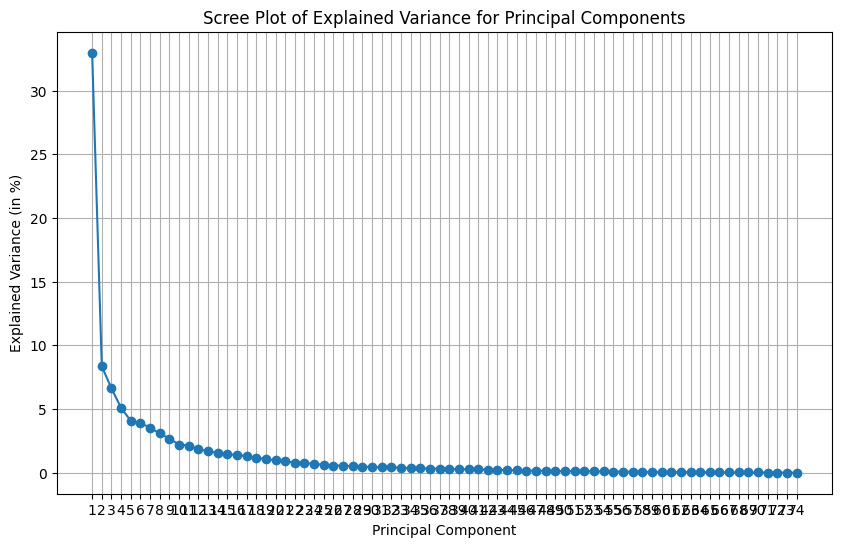

In [17]:
# Get the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Set figsize
plt.figure(figsize=(10, 6))

# Create a scree plot to visualize the explained variance
plt.plot(range(1, len(explained_variance) + 1), # x-axis
         explained_variance*100, # convert explained variance in percentage
         marker='o', # add a marker at each value
        )

# Add title and axis label
plt.title('Scree Plot of Explained Variance for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (in %)')

# Add label to x-axis
plt.xticks(range(1, len(explained_variance) + 1))

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()

/tmp/ipykernel_1759962/2504761829.py:36: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax[0].plot(mean_behavior[:,0],mean_behavior[:,1],label=position)


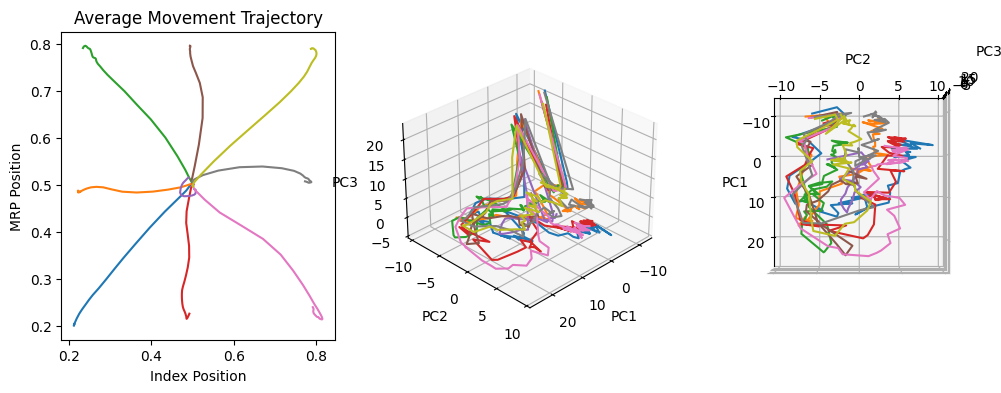

[0.19508611 0.11164007 0.08194735]


In [5]:
# run pca on our neural data
pca = PCA()
neural_pca = pca.fit_transform(data['neural'])

#lets group these by positions and average, like before:
reachpositions = np.unique(data['targetPosition'], axis=0)

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2, projection='3d')
ax3 = fig.add_subplot(1,3,3, projection='3d')
ax = [ax1,ax2, ax3]

grouped = {'neural_pca':[], 'behavior':[]}
for position in reachpositions:
    #get all trials for this target positions
    trials = np.unique(data['trialNumber'][np.argwhere((data['targetPosition'] == position).all(axis=1))])

    lens = np.stack([np.sum(data['trialNumber'] == trial) for trial in trials])

    # we need to align our trials since they are usually different lengths.
    # There are better ways to do this (time warping, etc.), but here we'll just truncate to the shortest trial of the group
    behavior = np.zeros((len(lens), np.min(lens), 6))
    neural = np.zeros((len(lens), np.min(lens), 96))
    for i, trial in enumerate(trials):
        behavior[i,:,:] = data['behavior'][(data['trialNumber'] == trial)[:,0],:][0:np.min(lens),:]
        neural[i,:,:] = neural_pca[(data['trialNumber'] == trial)[:,0],:][0:np.min(lens),:]

    grouped['behavior'].append(behavior)
    grouped['neural_pca'].append(neural)

    mean_behavior = np.mean(behavior, axis=0)
    mean_neural = np.mean(neural, axis=0)

    ax[0].plot(mean_behavior[:,0],mean_behavior[:,1],label=position)
    ax[1].view_init(elev=30, azim=45)
    ax[1].plot(mean_neural[:,0], mean_neural[:,1],mean_neural[:,2])
    ax[1].set(xlabel='PC1',ylabel='PC2',zlabel='PC3')
    ax[2].view_init(elev=90, azim=0)
    ax[2].plot(mean_neural[:,0], mean_neural[:,1],mean_neural[:,2])
    ax[2].set(xlabel='PC1',ylabel='PC2',zlabel='PC3')

ax[0].set(title='Average Movement Trajectory',xlabel='Index Position',ylabel='MRP Position')
plt.show()
print(pca.explained_variance_ratio_[0:3])